## Data Preprocessing

In [1]:
import numpy as np

train_file = "./solar_train_data/data.npy"
train_data = np.load(train_file)
print(train_data.shape)

val_file = "./solar_test_data/data.npy"
val_data = np.load(val_file)
print(val_data.shape)


(11857, 65537)
(1318, 65537)


(256, 256, 3)


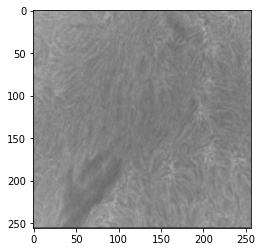

In [36]:
import matplotlib.pyplot as plt
import cv2 
img=train_data[1,1:].reshape( 256, 256)

image = np.dstack([img,img,img])

plt.figure()
plt.imshow(image)
print(image.shape)

In [37]:
train_label =  train_data[:, 0 ]
val_label=val_data[:,0]
print(train_label)
print(val_label)

[0 0 0 ... 4 4 4]
[0 0 0 ... 4 4 4]


In [38]:
train_data=train_data[:, 1: ]
train_data.shape

(11857, 65536)

In [39]:
train_img = []
for i in range(train_data.shape[0]):
  img=train_data[i,0:].reshape(256,256)
  # print(img.shape)
  image= np.dstack([img,img,img]) 
  train_img.append(image)



In [40]:
train_img = np.array(train_img)
print(train_img.shape,train_label.shape)

(11857, 256, 256, 3) (11857,)


In [41]:
val_img = []
val_data=val_data[:, 1: ]
for i in range(val_data.shape[0]):
  img=val_data[i,0:].reshape(256,256)
  # print(img.shape)
  image= np.dstack([img,img,img]) 
  val_img.append(image)


In [42]:
val_img = np.array(val_img)
print(val_img.shape,val_label.shape)

(1318, 256, 256, 3) (1318,)


##Using VGG-16 Pre-trained Model

In [43]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout
from keras.layers import Flatten
# load model without output layer
base_model = VGG16(include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False
flat1 = Flatten()(base_model.layers[-1].output)
drop1 = Dropout(0.25)(flat1)
class1 = Dense(1024, activation='relu')(drop1)
drop2 = Dropout(0.25)(class1)
output = Dense(5, activation='softmax')(drop2)
# define new model
model = Model(inputs=base_model.inputs, outputs=output)


In [44]:
print(model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)      

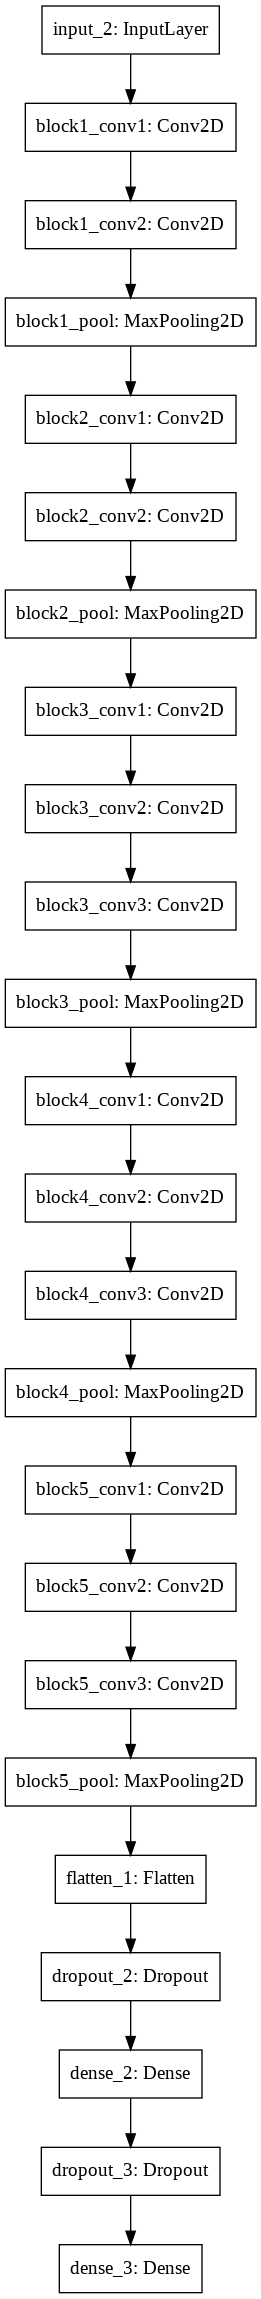

In [45]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

In [46]:
from sklearn.utils import shuffle
train_img, train_label = shuffle(train_img, train_label,random_state=32)

val_img, val_label = shuffle(val_img, val_label,random_state=25)



In [47]:

print(train_img.shape,train_label.shape)
print(val_img.shape,val_label.shape)

(11857, 256, 256, 3) (11857,)
(1318, 256, 256, 3) (1318,)


**Model Training**

In [49]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
num_classes = 5
batch=32

adam = Adam(lr=0.0001)
model.compile(optimizer='adam',  # adadelta
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

History=model.fit(train_img, train_label,
          epochs=5,
          batch_size=batch,
          validation_data=(val_img, val_label),
          verbose=2)

Epoch 1/5
371/371 - 31s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
371/371 - 31s - loss: 0.3759 - accuracy: 0.9972 - val_loss: 0.2692 - val_accuracy: 0.9985
Epoch 3/5
371/371 - 31s - loss: 0.1750 - accuracy: 0.9995 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
371/371 - 30s - loss: 0.0623 - accuracy: 0.9997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
371/371 - 31s - loss: 0.1338 - accuracy: 0.9995 - val_loss: 0.4578 - val_accuracy: 0.9992


In [59]:
model.save("./Solar_Image.h")
print("Model Saved")

INFO:tensorflow:Assets written to: /content/drive/My Drive/CL_398/Solar_Image.h/assets
Model Saved


**Plot of the error and the accuracy of the model** 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


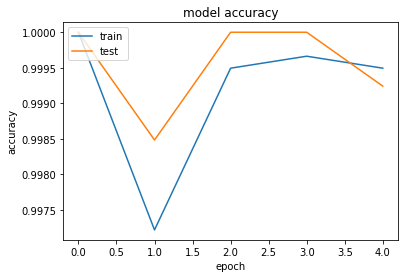

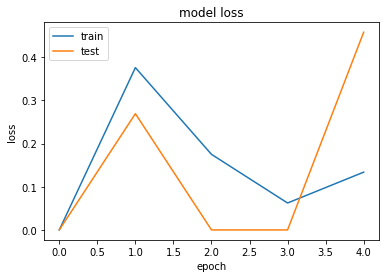

In [51]:
print(History.history.keys())
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Prediction on new image

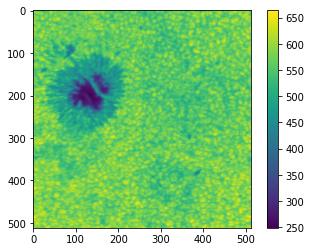

In [52]:
from astropy.io import fits
image_data = fits.getdata('./Example/FG20111008_112033.3.fits', ext=0).astype(np.float64)
plt.figure()
plt.imshow(image_data)
plt.colorbar()
from keras.preprocessing.image import img_to_array

image_data = img_to_array(image_data)
image = image.reshape((1, 256, 256, 3))


In [53]:
print(image_data.shape)

(512, 512, 1)


In [54]:
from skimage.transform import resize
img = resize(image_data,(256,256),anti_aliasing=True)
image = image.reshape((1, 256, 256, 3))
# image = np.dstack([img,img,img])
print(image.shape)
image = preprocess_input(image)

(1, 256, 256, 3)


In [55]:
y=model.predict(image)

In [56]:
print(y)

[[0. 0. 0. 0. 1.]]


In [57]:
label_dict = {
  "filaments" : 0,
  "flares" : 1,
  "prominences" : 2,
  "quiet" : 3,
  "sunspots" : 4}

In [58]:

class_labels = ['filaments', 'flares', 'prominences', 'quiet', 'sunspots']

class_labels[np.argmax(y[0])]

'sunspots'